### EDA

In [36]:
# imports
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from  nltk.stem import PorterStemmer

In [2]:
# initialize db connection
db_con = sqlite3.connect('../../part-02/data/yelp.db.sqlite')

In [3]:
# initialize dataframe
reviews = pd.DataFrame(pd.read_sql('select * from reviews;',
           con=db_con))

In [4]:

# boxplot function
def box_plot(df, column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('pink', 8))
    
    ax2.hist(df[column_name], color='pink', 
             orientation='horizontal')
    ax1.set_title(column_name, fontsize=16)
    ax2.set_title(column_name, fontsize=16)
    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

### Review the data

In [5]:
# visualize first 5 records
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,target,num_words,num_chars
0,-P5E9BYUaK7s3PwBF5oAyg,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5,0,0,0,First time there and it was excellent It feels...,2017-02-19 13:32:05,0,39,212
1,dQ3EU6cevDqHAr_ygy1O8A,CNyXcn0c0V5CFmigqqw-Xg,oY5LFo6Yxxf32ePna6mEUQ,5,1,0,0,I absolutely love this place Great hours impe...,2014-12-30 17:55:51,1,12,70
2,Pgh9POx-bH7JFggKXqXWMQ,8fL5qUckzt_nAC1uwvbr0w,uW8L6awmCyjovD9OhWPo7g,5,1,0,1,As far as I know this is the best video rental...,2008-04-30 15:49:16,1,72,360
3,Sgs-rER85vBaOBSPVo96xw,EIi4Fy_JW_6v7DaRDet1uw,Q1HHAb4FzrzfnnrRyA8fgg,4,0,0,0,Great atmosphere and service I dont know how o...,2015-07-28 14:26:48,0,71,320
4,yqJv_8CoXNb-NpaEiTY4yw,ZiI40HVbRbFE-tv2K8OQkw,45siW2fI0Cuv5ZKCS23knA,5,0,0,0,Great new location on Central Great staff and ...,2014-04-19 13:06:28,0,20,114


In [6]:
# check shape
reviews.shape

(21032, 12)

In [7]:
# check columns
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'target', 'num_words', 'num_chars'],
      dtype='object')

### Summary statistics

In [8]:
# descriptive statistics
reviews.stars.describe()

count    21032.000000
mean         3.747147
std          1.485500
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [9]:
# skewness of data
reviews.stars.skew()

-0.8462207629580617

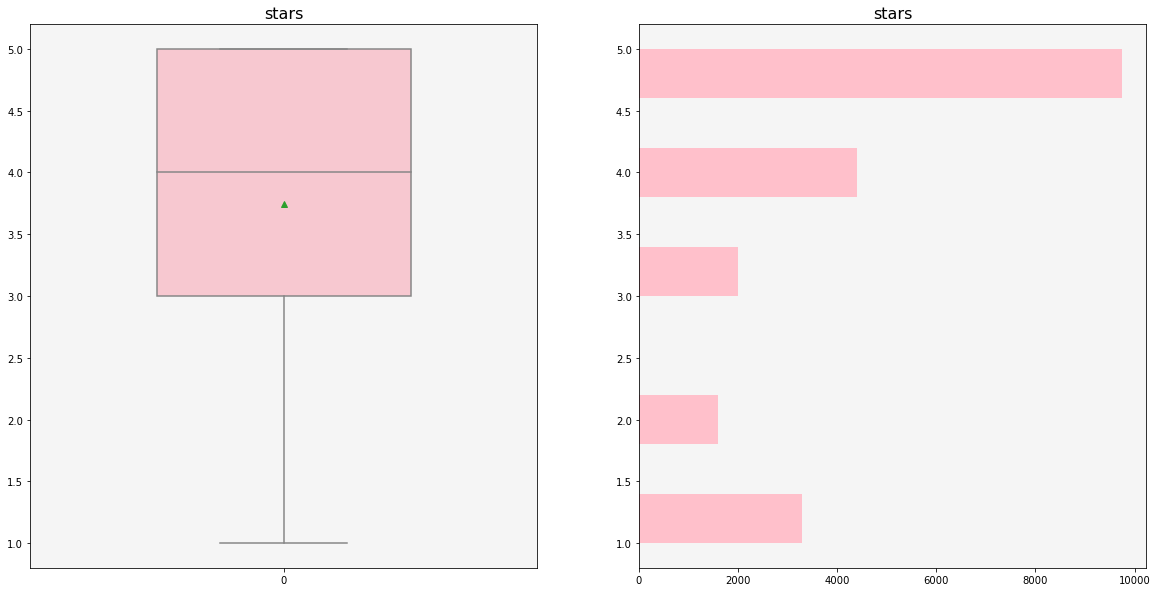

In [10]:
# visualize the data
box_plot(reviews, 'stars')

The 'stars' column shows moderate negative skew.  The median and mean are separated by 1, and the spread through the IQR is relatively large.

In [11]:
# descriptive statistics
reviews.useful.describe()

count    21032.000000
mean         1.195036
std          6.651468
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        840.000000
Name: useful, dtype: float64

In [12]:
# skewness of data
reviews.useful.skew()

100.26511356897612

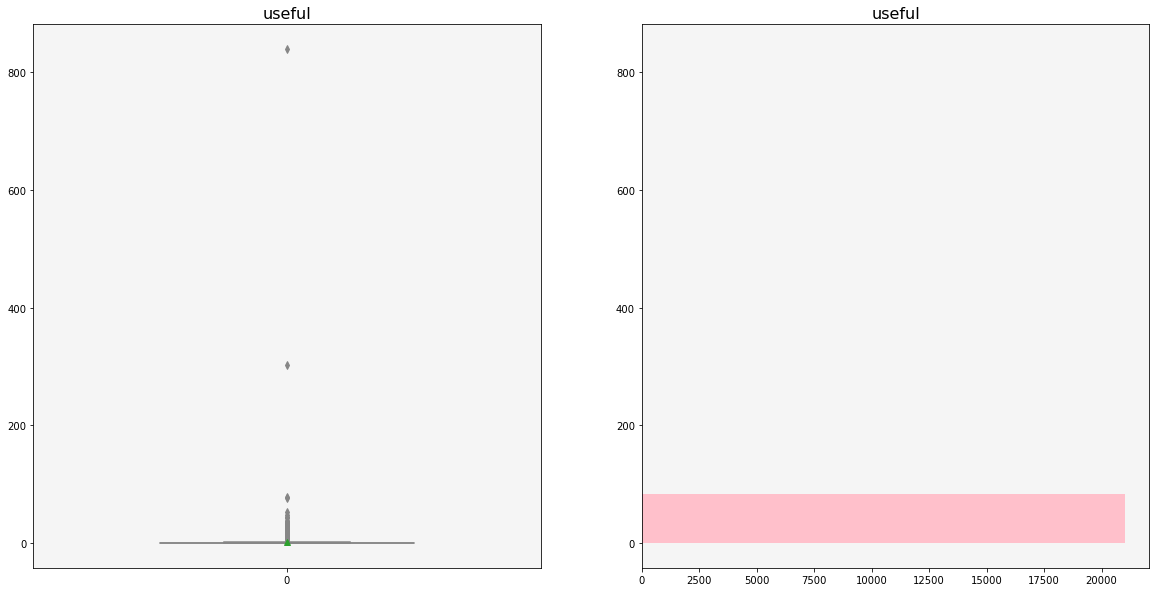

In [13]:
# visualize the data
box_plot(reviews, 'useful')

(Note: this was the column that the target was created from.  All values of zero got assigned zero, and every other value got a one.)

This data is extremely positively skewed, and requires outliers to be addressed.  Investigating the data, it looks like reviews with 'useful' greater than 100 can be dropped. The median is 0 and mean is 1.20.  The outliers are heavily impacting the IQR.

In [14]:
# descriptive statistics
reviews.funny.describe()

count    21032.000000
mean         0.311192
std          1.175694
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: funny, dtype: float64

In [15]:
# sknewness of data
reviews.funny.skew()

9.845942231214517

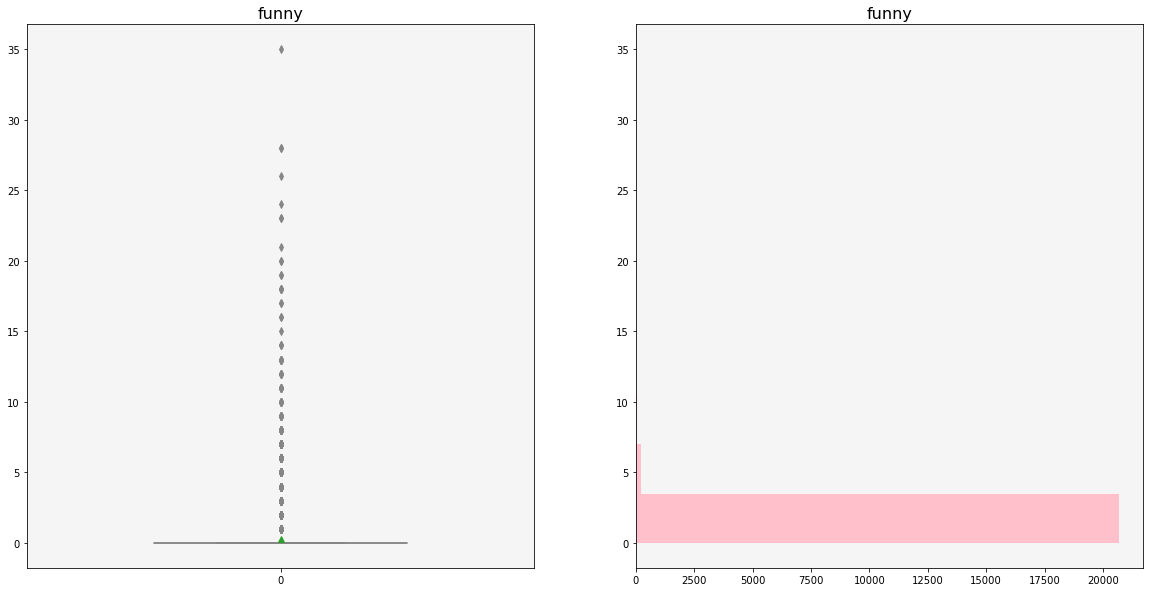

In [16]:
# visualize the data
box_plot(reviews, 'funny')

Similary to the useful column, the funny column shows extensive positive skew, though the outlier range is less expansive than the 'useful' column.  I have elected to not deal with the outliers in this instance, as most of the values are zero. Instead, I will drop the column. 

The mean is 0.31, and the median is 0.  The spread is very small through the IQR, with outliers contributing to the larger area of spread.  

In [17]:
# descriptive statistics
reviews.cool.describe()

count    21032.000000
mean         0.484880
std          2.717127
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        303.000000
Name: cool, dtype: float64

In [18]:
# skewness of data
reviews.cool.skew()

69.6692554361721

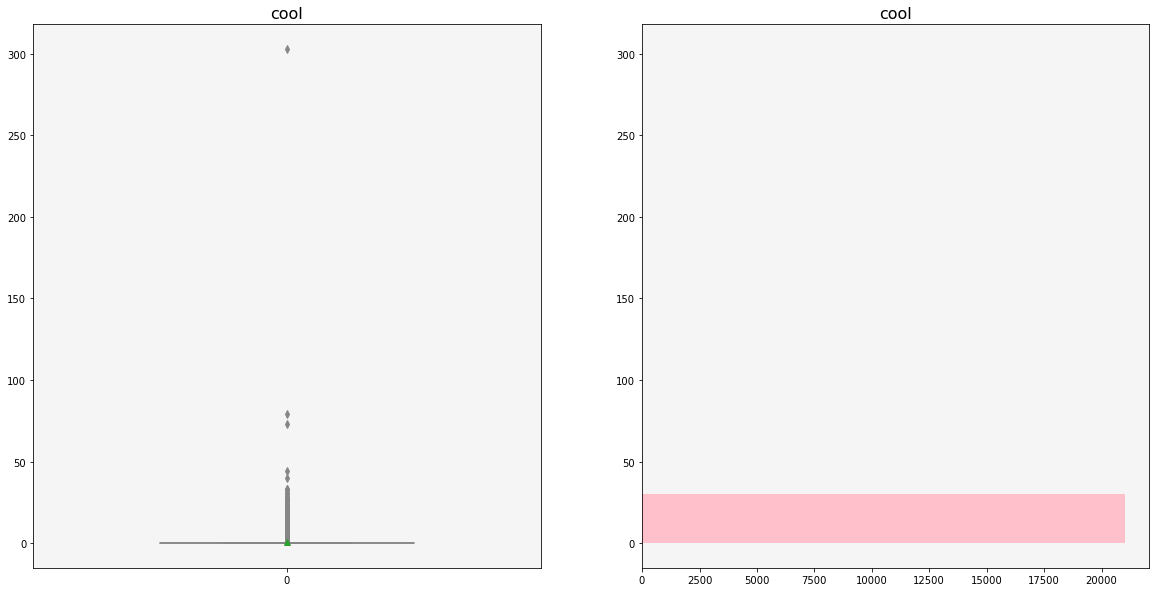

In [19]:
# visualize the data
box_plot(reviews, 'cool')

Similarly to the 'funny' column, the data is heavily positively skewed, with most of the values being zero.  I have elected to not deal with the outliers in this instance. Instead I will drop the column. 



In [20]:
# descriptive statistics
reviews.num_words.describe()

count    21032.000000
mean       108.575076
std        102.135081
min          1.000000
25%         43.000000
50%         77.000000
75%        138.000000
max       1002.000000
Name: num_words, dtype: float64

In [21]:
# skewness of data
reviews.num_words.skew()

2.7248802511452985

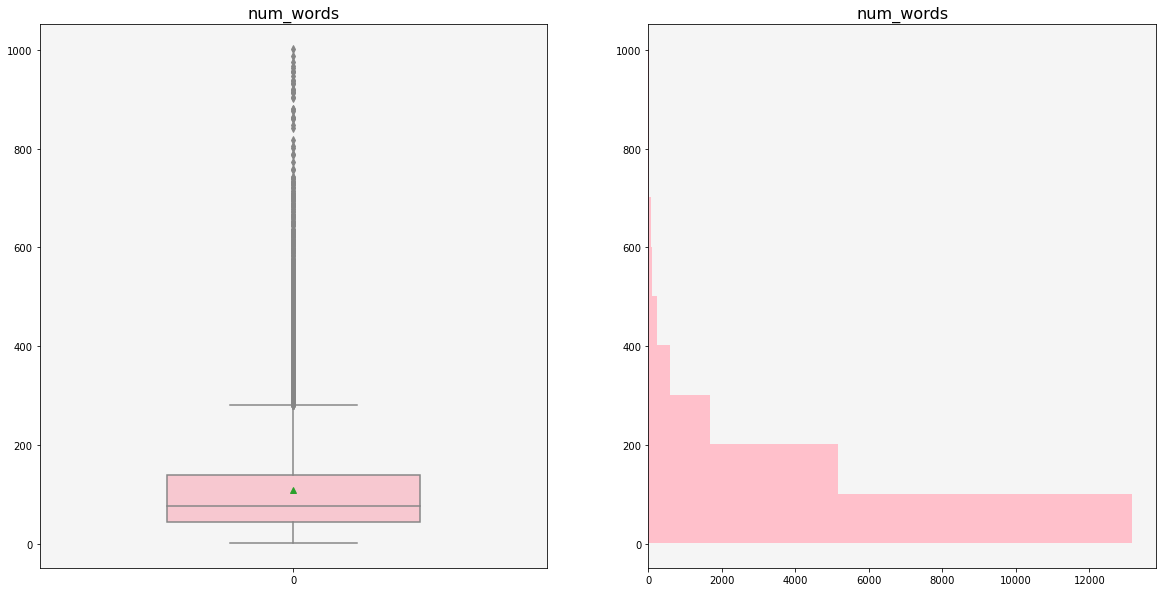

In [22]:
# visualize the data
box_plot(reviews, 'num_words')

The mean and median are offset from each other by some degree, and the spread through the IQR is fairly small.  The data is highly positively skewed.  There are outliers which need to be dealth with, so I'm going to drop numbers of words that are > 600.

In [23]:
# summary statistics
reviews.num_chars.describe()

count    21032.000000
mean       555.283853
std        516.577952
min          8.000000
25%        223.000000
50%        396.000000
75%        707.000000
max       4868.000000
Name: num_chars, dtype: float64

In [24]:
reviews.num_chars.skew()

2.7359704121219197

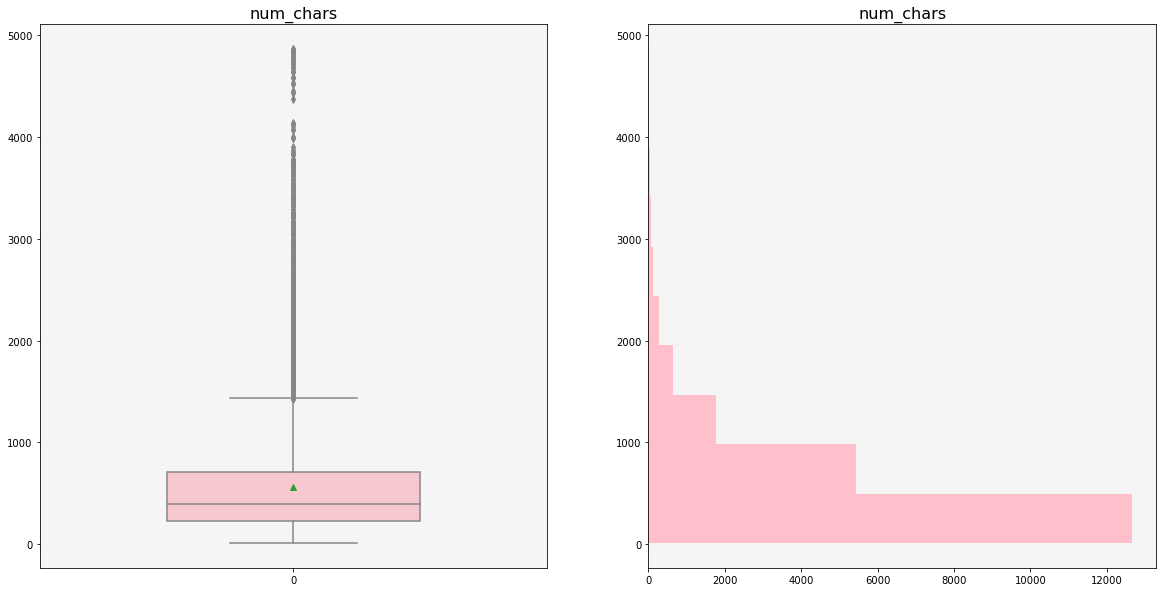

In [25]:
box_plot(reviews, 'num_chars')

The num_chars shows heavy positive skew, with outliers above 2,500.  The mean is 555.28, and the median is 396.00, which shows heavy offset.  The spread through the IQR is fairly small, with those outliers mentioned skewing the data.  

### Data clean up
(After reviewing the summary statistics and visualizaing the data)

In [26]:
# drop columns that have too many zero values
reviews.drop(['funny', 'cool'], axis=1, inplace=True)

In [27]:
# drop useful with values greater than 100
reviews.drop(reviews[reviews.useful > 100].index, 
             inplace=True)

In [28]:
# drop num_words that are greater than 600
reviews[reviews.num_words < 600]
reviews.drop(reviews[reviews.num_words > 600].index, 
             inplace=True)

In [29]:
# drop num_chars that are greater than 600
reviews[reviews.num_chars < 2500]
reviews.drop(reviews[reviews.num_chars > 2500].index, 
             inplace=True)

In [30]:
# reset index
reviews.reset_index(inplace=True, drop=True)


### Export data

In [31]:
# export clean data to csv
reviews.to_csv('../../part-02/data/yelp_cleaned.csv',
               index=False)

In [33]:
# import data to db
reviews.to_sql(
    'reviews_cleaned',
    con=db_con,
    if_exists = 'replace',
    index=False
    )

In [34]:
# check numbers of rows in db
pd.read_sql('select count(*) as count from reviews_cleaned;',
           con=db_con)

,count
0,20789


### Word tokens

In [38]:
# stem the reviews
stemmer = PorterStemmer()
reviews.text = reviews.text.apply(lambda x: stemmer.stem(x))

In [39]:
# instantiate vectorizer
tvec = TfidfVectorizer(stop_words = 'english',
                       strip_accents = 'ascii',
                       max_features = 200,
                       max_df = .60,
                       norm = 'l2'
                      )
tvec.fit(reviews.text)

TfidfVectorizer(max_df=0.6, max_features=200, stop_words='english',
                strip_accents='ascii')

In [40]:
# create vectorized dataframe
reviews_tokens = pd.DataFrame(tvec.transform(reviews.text).todense(),
                  columns = tvec.get_feature_names())

In [43]:
# visualize the tokens
reviews_tokens.head()

,10,absolutely,actually,amazing,area,ask,asked,atmosphere,away,awesome,...,want,wanted,wasnt,way,went,wonderful,work,worth,years,youre
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.589598,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.292284,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.273026,0.0,0.0,...,0.000000,0.0,0.264327,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.434320,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
reviews_tokens.amazing.sort_values(ascending=False)

2188     1.000000
1320     0.934097
14093    0.829410
7536     0.820700
4936     0.819978
           ...   
7308     0.000000
7307     0.000000
7305     0.000000
7304     0.000000
20788    0.000000
Name: amazing, Length: 20789, dtype: float64